In [0]:
#import des datas
import numpy as np
import pandas as pd
import os
os.chdir(r"D:\Data Machine learning")
df = pd.read_csv("data-clients.csv",sep='\t')


In [0]:
df.head()

,CustomerID,totalCancelled,totalDiscount,meanUnitPrice,totalNbArticle,totalAmount,totalInvoice,meanPriceInvoice,daysLastInvoice,daysFirstInvoice,SDevUnitPrice,SdevPrice,labels
0,18074.0,0.0,0.0,4.780769,190.0,489.60,1.0,489.60,373.0,373.0,3.698059,28.254374,0
1,13747.0,0.0,0.0,9.950000,8.0,79.60,1.0,79.60,373.0,373.0,0.000000,0.000000,0
2,12791.0,0.0,0.0,8.425000,97.0,192.60,1.0,192.60,373.0,373.0,9.298454,114.975563,0
3,17908.0,0.0,0.0,2.662222,169.0,232.03,1.0,232.03,373.0,373.0,2.028171,3.585861,0
4,16583.0,0.0,0.0,2.564286,111.0,233.45,1.0,233.45,373.0,373.0,1.194125,1.976472,0


In [0]:
#On transforme le label -1 en 4
df['labels'][df['labels']==-1] = 4

C:\Users\adrien\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#On remplace l'index généré automatiquement par le customerID
df.set_index('CustomerID',inplace=True)
df.head(5)

,totalCancelled,totalDiscount,meanUnitPrice,totalNbArticle,totalAmount,totalInvoice,meanPriceInvoice,daysLastInvoice,daysFirstInvoice,SDevUnitPrice,SdevPrice,labels
CustomerID,,,,,,,,,,,,
18074.0,0.0,0.0,4.780769,190.0,489.60,1.0,489.60,373.0,373.0,3.698059,28.254374,0
13747.0,0.0,0.0,9.950000,8.0,79.60,1.0,79.60,373.0,373.0,0.000000,0.000000,0
12791.0,0.0,0.0,8.425000,97.0,192.60,1.0,192.60,373.0,373.0,9.298454,114.975563,0
17908.0,0.0,0.0,2.662222,169.0,232.03,1.0,232.03,373.0,373.0,2.028171,3.585861,0
16583.0,0.0,0.0,2.564286,111.0,233.45,1.0,233.45,373.0,373.0,1.194125,1.976472,0


In [0]:
round(df.groupby(['labels']).mean(),2)

,totalCancelled,totalDiscount,meanUnitPrice,totalNbArticle,totalAmount,totalInvoice,meanPriceInvoice,daysLastInvoice,daysFirstInvoice,SDevUnitPrice,SdevPrice
labels,,,,,,,,,,,
0,0.00,0.00,3.11,402.61,659.11,2.27,294.92,107.88,194.54,2.68,15.26
1,1.00,0.00,3.44,246.25,420.98,1.38,319.38,224.95,238.57,2.87,12.83
2,1.00,0.00,3.24,364.57,568.01,2.90,212.52,168.29,341.29,2.73,20.75
3,1.00,0.00,3.14,1133.21,1957.54,5.51,365.67,33.43,253.94,3.07,17.01
4,0.68,0.04,13.78,5372.33,9391.63,12.44,1137.79,81.72,287.51,15.04,294.86


In [0]:
#Séparation du dataset en train/test
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,test_size=0.3,stratify=df["labels"])

In [0]:
df_train.groupby(['labels']).size()

labels
0    1830
1     103
2      15
3     708
4     381
dtype: int64

In [0]:
#Modèle de classification LinearSVC avec les cluster RFM :
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
X = df_train.iloc[:,:-1].as_matrix()
#Normalisation:
scaler = preprocessing.StandardScaler().fit(X)
X_norm = scaler.transform(X)
y = df_train.iloc[:,-1].as_matrix()

params = {'C': np.logspace(-3,5,10)}

clf = LinearSVC()
gs_svm = GridSearchCV(clf,params, cv=10)
gs_svm.fit(X_norm, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-03, 7.74264e-03, 5.99484e-02, 4.64159e-01, 3.59381e+00,
       2.78256e+01, 2.15443e+02, 1.66810e+03, 1.29155e+04, 1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
#Test SVC:
from sklearn.metrics import accuracy_score,f1_score,recall_score


y_test = df_test.iloc[:,-1].as_matrix()
X_test = df_test.iloc[:,1:].as_matrix()
X_test_norm = scaler.transform(X_test)
y_pred= gs_svm.predict(X_test_norm)
#Affichage des performances :
print(gs_svm.best_params_)
print(gs_svm.score(X_test_norm,y_test))
print(f1_score(y_test, y_pred,average='macro'))

{'C': 27.825594022071257}
0.1251920122887865
0.04450511945392492


C:\Users\adrien\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X = df_train.iloc[:,:-1].as_matrix()
y = df_train.iloc[:,-1].as_matrix()
X_test = df_test.iloc[:,:-1].as_matrix()
y_test = df_test.iloc[:,-1].as_matrix()
rfc = RandomForestClassifier()
# Hyperparamètres testé ( liste réduite pour le temps de calcul)
params = { 'n_estimators': [200],
          'max_features': [0.7], 
          'max_depth': [10,11,12]
         }
gs_rfc = GridSearchCV(rfc,params, cv=10)
gs_rfc.fit(X, y)
pred_rfc = gs_rfc.predict(X_test)

#affichage des performances :
print(accuracy_score(y_test, pred_rfc))
print(metrics.f1_score(y_test, pred_rfc,average='macro'))
print(metrics.recall_score(y_test, pred_rfc,average='macro'))
print(gs_rfc.best_params_)

0.9708141321044547
0.9142311017343736
0.9147283615846511
{'max_depth': 12, 'max_features': 0.7, 'n_estimators': 200}


In [0]:
# Implementation  Random Forest avec les meilleurs paramètres : 
import time
tmps1=time.clock()
params = { 'n_estimators': 200,
          'max_features': 0.7, 
          'max_depth': 12
         }
rfc = RandomForestClassifier(n_estimators= 200,max_features= 0.7,max_depth= 11)
rfc.fit(X,y)
rfc_prediction = rfc.predict(X_test)
tmps2=time.clock()
print("Temps d'execution = %s" %(tmps2-tmps1))
print(accuracy_score(y_test, rfc_prediction))
print(metrics.f1_score(y_test, rfc_prediction,average='macro'))
print(metrics.recall_score(y_test, rfc_prediction,average='macro'))

Temps d'execution = 1.8833725660376786
0.9685099846390169
0.9243997859613643
0.908232722106171


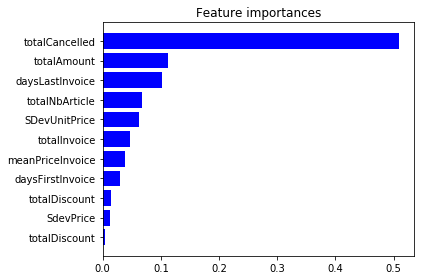

In [0]:
import matplotlib.pyplot as plt
importances = rfc.feature_importances_

indices = np.argsort(importances)


plt.figure()
plt.title("Feature importances")
plt.barh(range(importances.shape[0]), importances[indices],
       color="b", align="center")
indices = reversed(['totalCancelled','totalAmount','daysLastInvoice','totalNbArticle','SDevUnitPrice','totalInvoice',
'meanPriceInvoice','daysFirstInvoice','totalDiscount','SdevPrice','totalDiscount'])
plt.yticks(range(importances.shape[0]), indices)
plt.tight_layout()
plt.savefig("RF-Feature importances.png")
plt.show()

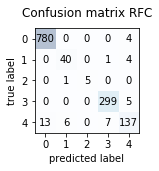

In [0]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
metrics.confusion_matrix(y_test, rfc_prediction)
fig, ax = plot_confusion_matrix(conf_mat=metrics.confusion_matrix(y_test, rfc_prediction))
plt.title("Confusion matrix RFC")
plt.tight_layout()
plt.savefig("RF-ConfusionMatrix.png")
plt.show()

In [0]:
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import accuracy_score
#X,y : 
X = df_train.iloc[:,:-1].as_matrix()
y = df_train.iloc[:,-1].as_matrix()
X_test = df_test.iloc[:,:-1].as_matrix()
y_test = df_test.iloc[:,-1].as_matrix()
#dtrain,dtest:
dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_test, label=y_test)
#Recherche eta, maxdepth parameters :
import copy
best_f1 =0
best_a = 0
best_b = 0
for a in [5,6,7,8,9,10,11]:
    for b in [0.15,0.175,0.2,0.225,0.25]: 
        param = {
            'max_depth': a,  
            'eta': b,  
            'silent': 1,  
            'objective': 'multi:softprob',  
            'num_class': 6,
            'n_estimators':200
            }  

        num_round = 10

        bst = xgb.train(param, dtrain, num_round)

        #Resultats:
        preds = bst.predict(dtest)
        best_preds = np.asarray([np.argmax(line) for line in preds])
        if metrics.f1_score(y_test, best_preds,average='macro')>best_f1:      
            best_f1 = metrics.f1_score(y_test, best_preds,average='macro')
            best_a = copy.deepcopy(a)
            best_b = copy.deepcopy(b)
print("Best max_depth :",best_a)
print("Best eta :",best_b)
print("Best f1_score :",best_f1)

Best max_depth : 5
Best eta : 0.25
Best f1_score : 0.9184985622760398


In [0]:
#Xgb with best parameters 
import time
tmps1=time.clock()
param = {
    'max_depth': 11,  
    'eta': 0.25,  
    'silent': 1, 
    'objective': 'multi:softprob',  
    'num_class': 6,
    'n_estimators':200
    } 

num_round = 10

bst = xgb.train(param, dtrain, num_round)

#Resultats:
preds = bst.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])
tmps2=time.clock()
print("Temps d'execution = %s" %(tmps2-tmps1))
print(metrics.f1_score(y_test, best_preds,average='macro'))
print(metrics.accuracy_score(y_test, best_preds))
print(metrics.recall_score(y_test, best_preds,average='macro'))

Temps d'execution = 0.1268477509722743
0.909570793294636
0.9662058371735791
0.9130967317504981


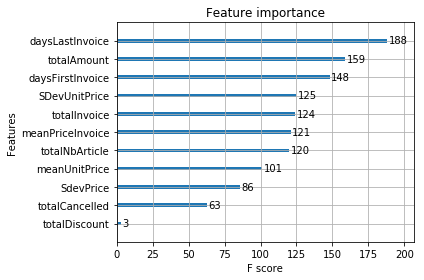

In [0]:
from xgboost import plot_importance
features = reversed(['daysLastInvoice','totalAmount','daysFirstInvoice','SDevUnitPrice','totalInvoice','meanPriceInvoice',
'totalNbArticle','meanUnitPrice','SdevPrice','totalCancelled','totalDiscount'])
plot_importance(bst)
plt.yticks(range(11), features)
plt.tight_layout()
plt.savefig("XGB-Fimportance.png")
plt.show()



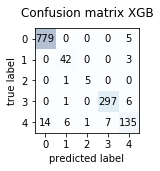

In [0]:
metrics.confusion_matrix(y_test, rfc_prediction)
fig, ax = plot_confusion_matrix(conf_mat=metrics.confusion_matrix(y_test, best_preds))
plt.title("Confusion matrix XGB")
plt.tight_layout()
plt.savefig("XGB-ConfusionMatrix.png")
plt.show()

In [0]:
bst.save_model( 'BST_XgbClassification-client.model')